In [4]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv("/data/iris.csv")
del df["Id"]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [35]:
target = "Species"
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


est = tree.DecisionTreeClassifier(max_depth=3
                        , min_samples_leaf=10, min_samples_split=25)

est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("test accurarcy", metrics.accuracy_score(y_test, y_test_pred))
print("train accurarcy", metrics.accuracy_score(y_train, y_train_pred))

print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))


test accurarcy 0.9555555555555556
train accurarcy 0.9619047619047619
confusion matrix
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [9]:
from sklearn.tree import export_graphviz
export_graphviz(est, out_file = "tree.dot", feature_names = X.columns, filled=True)
!dot -Tpng tree.dot -o tree.png


In [14]:
target = "Species"
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=3
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(solver="liblinear"))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test accurarcy", metrics.accuracy_score(y_test, y_test_pred))
print("train accurarcy", metrics.accuracy_score(y_train, y_train_pred))

print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))


test accurarcy 0.9555555555555556
train accurarcy 0.9714285714285714
confusion matrix
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
features = ["SepalLengthCm", "PetalLengthCm"]

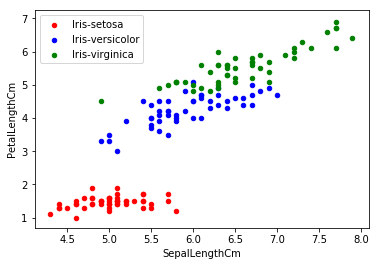

In [20]:
fig, ax = plt.subplots()
colors = ["red", "blue", "green"]
for i, v in enumerate(df.Species.unique()):
    df[df.Species == v][features].plot.scatter(0, 1
                        , color = colors[i], ax = ax, label = v)
    

In [22]:
target = "Species"
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(df[target])
X = df[features]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=3
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(solver="liblinear"))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test accurarcy", metrics.accuracy_score(y_test, y_test_pred))
print("train accurarcy", metrics.accuracy_score(y_train, y_train_pred))

print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))


test accurarcy 0.9333333333333333
train accurarcy 0.9714285714285714
confusion matrix
 [[14  0  0]
 [ 1 15  2]
 [ 0  0 13]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [23]:
from mlxtend.plotting import plot_decision_regions

Text(0, 0.5, 'PetalLengthCm')

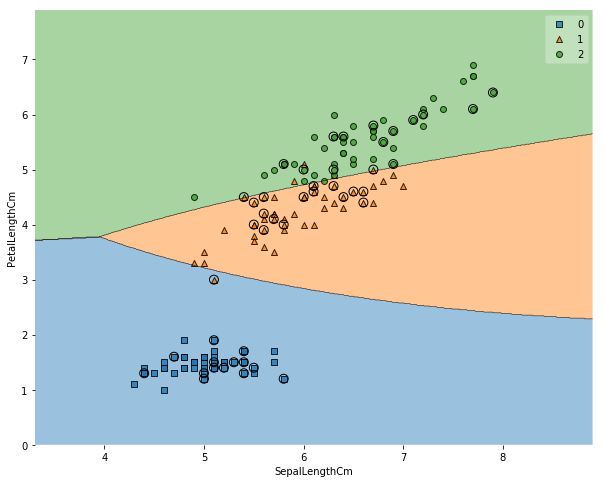

In [34]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X.values, y, pipe, X_highlight= X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

test accurarcy 0.7555555555555555
train accurarcy 0.8285714285714286
confusion matrix
 [[14  0  0]
 [ 1  7 10]
 [ 0  0 13]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Text(0, 0.5, 'PetalLengthCm')

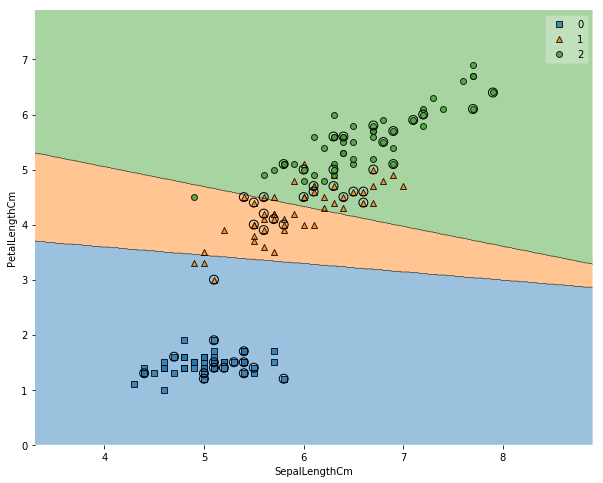

In [39]:
target = "Species"
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(df[target])
X = df[features]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=3
    #                                , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test accurarcy", metrics.accuracy_score(y_test, y_test_pred))
print("train accurarcy", metrics.accuracy_score(y_train, y_train_pred))

print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))

plt.figure(figsize=(10, 8))
plot_decision_regions(X.values, y, pipe, X_highlight= X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [45]:
est = pipe.steps[-1][-1]
est.coef_, est.intercept_

(array([[-0.63411409, -3.04362246],
        [-0.36839579,  0.69298495],
        [ 0.04217339,  3.09781116]]),
 array([-1.69383355, -0.81951784, -1.71518613]))

test accurarcy 0.9555555555555556
train accurarcy 0.9904761904761905
confusion matrix
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


Text(0, 0.5, 'PetalLengthCm')

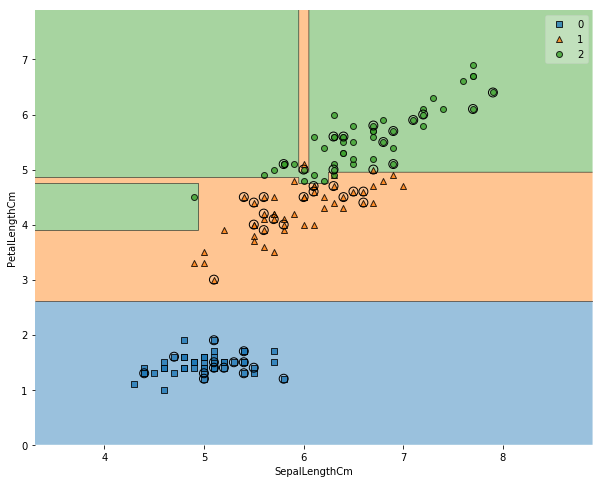

In [37]:
target = "Species"
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(df[target])
X = df[features]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=3
    #                                , include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test accurarcy", metrics.accuracy_score(y_test, y_test_pred))
print("train accurarcy", metrics.accuracy_score(y_train, y_train_pred))

print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))

plt.figure(figsize=(10, 8))
plot_decision_regions(X.values, y, pipe, X_highlight= X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


test accurarcy 0.9777777777777777
train accurarcy 0.9809523809523809
confusion matrix
 [[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]


Text(0, 0.5, 'PetalLengthCm')

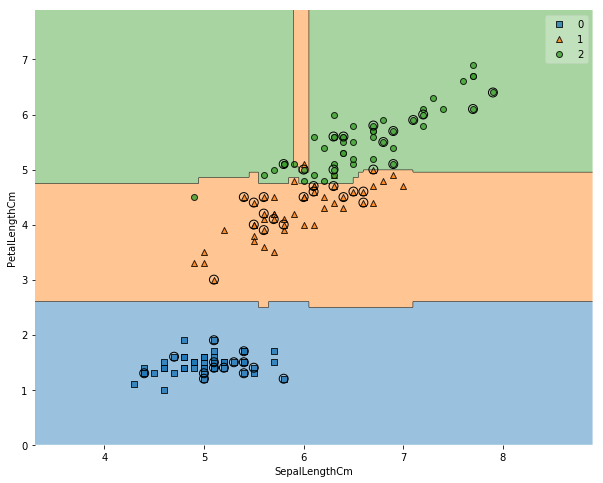

In [38]:
target = "Species"
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(df[target])
X = df[features]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=3
    #                                , include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test accurarcy", metrics.accuracy_score(y_test, y_test_pred))
print("train accurarcy", metrics.accuracy_score(y_train, y_train_pred))

print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))

plt.figure(figsize=(10, 8))
plot_decision_regions(X.values, y, pipe, X_highlight= X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])